# **DAY 12 – Введение в анализ данных**  


## **Pandas, SQL, визуализация данных**

# **Task 3: Столбиковая диаграмма (barchart)**
У нас есть еще один вопрос, на который необходимо ответить: когда пользователи обычно выполняют лабораторные задания (делают коммиты): ночью, утром, днем или вечером? И как их поведение менялось с течением времени?

**Выполните необходимые шаги по созданию следующего графика:**



**1. Анализируйте только пользователей, а не администраторов.**  


**2. Используйте фильтр status = 'ready' для коммитов.**  



In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
import pandas as pd
from sqlite3 import connect
import matplotlib.pyplot as plt

In [4]:
con = connect('/content/drive/MyDrive/School21/day12/data/checking-logs.sqlite')

In [5]:
query = '''
    SELECT timestamp as commit_time
    FROM checker
    WHERE status = 'ready'
    AND uid LIKE 'user_%'
    '''
df = pd.io.sql.read_sql(query, con, parse_dates='commit_time')
df.head()

,commit_time
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:45.549397
2,2020-04-17 05:34:24.422370
3,2020-04-17 05:43:27.773992
4,2020-04-17 05:46:32.275104


**3. Размеры шрифта и figsize такие же, как и раньше.**  

**4. Ночь — с 0:00:00 до 03:59:59,  
  утро — с 04:00:00 до 09:59:59,  
  день — с 10:00:00 до 16:59:59,  
  вечер — с 17:00:00 до 23:59:59.**  

**5. Выберите цветовую палитру по своему вкусу, не обязательно использовать те же самые цвета, что на графике выше.**  



In [6]:
df['date'] = df['commit_time'].dt.date
df['hour'] = df['commit_time'].dt.hour

cut_time = ['Ночь', 'Утро', 'День', 'Вечер']
cut_bins = [0, 4, 10, 17, 24]
df['daytime'] = pd.cut(df['hour'], bins=cut_bins, labels=cut_time, right=False)

In [7]:
df

,commit_time,date,hour,daytime
0,2020-04-17 05:19:02.744528,2020-04-17,5,Утро
1,2020-04-17 05:22:45.549397,2020-04-17,5,Утро
2,2020-04-17 05:34:24.422370,2020-04-17,5,Утро
3,2020-04-17 05:43:27.773992,2020-04-17,5,Утро
4,2020-04-17 05:46:32.275104,2020-04-17,5,Утро
...,...,...,...,...
1681,2020-05-21 20:01:48.959966,2020-05-21,20,Вечер
1682,2020-05-21 20:18:54.487900,2020-05-21,20,Вечер
1683,2020-05-21 20:19:06.872761,2020-05-21,20,Вечер
1684,2020-05-21 20:22:41.877806,2020-05-21,20,Вечер


In [8]:
df['views'] = 1
df1 = df.drop(columns=['commit_time', 'hour']).groupby(by=['date', 'daytime'], dropna = False).count()
df1.head(10)

views
date       daytime       
2020-04-17 Ночь         0
           Утро         7
           День         6
           Вечер        0
2020-04-18 Ночь         0
           Утро         1
           День        19
           Вечер       19
2020-04-19 Ночь         1
           Утро         2

In [9]:
df2 = pd.pivot_table(df1, values = 'views', columns = 'daytime', index = 'date')
df2.head()

daytime,Ночь,Утро,День,Вечер
date,,,,
2020-04-17,0,7,6,0
2020-04-18,0,1,19,19
2020-04-19,1,2,9,6
2020-04-20,0,0,8,8
2020-04-21,0,0,0,13


In [10]:
df2.shape

(35, 4)

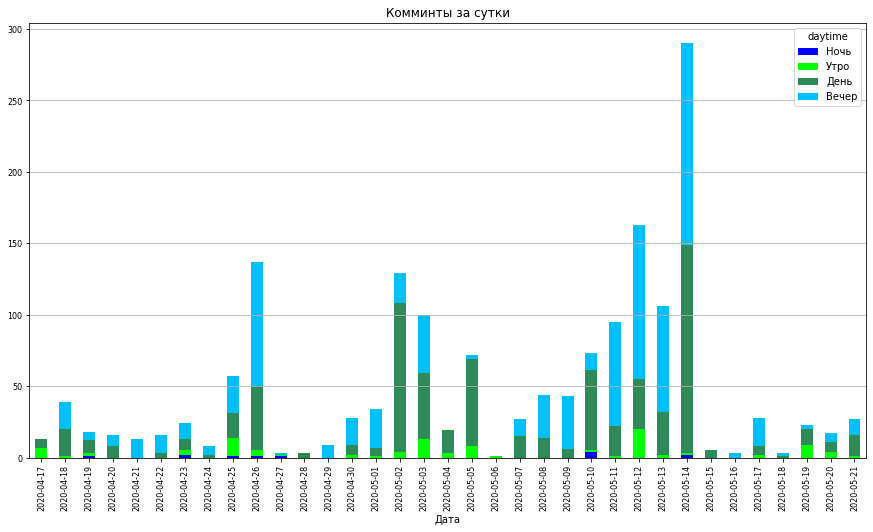

In [12]:
df2.plot(kind = 'bar',
         stacked = True,
         fontsize = 8,
         figsize=(15, 8),
         title='Комминты за сутки',
         xlabel = 'Дата',
         rot=90,
         color = ['b', 'lime', 'seagreen', 'deepskyblue'],
         )
plt.gca().yaxis.grid(True)
plt.show()

**6. В конце Jupyter Notebook создайте markdown-ячейки и вставьте в них следующие вопросы.**  

*   **«Когда пользователи обычно выполняют лабораторные задания: ночью, утром, днем или вечером?»**

**Ответ: День и Вечер.**  



*   **«В какой день имеется наибольшее количество коммитов и одновременно с этим количество коммитов вечером выше, чем днем?»**

 **Ответ: 2020-05-12.**